# Principal Component Analysis

We will use a well-known base to learn in practice how PCA works.

The base will be Iris Dataset

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Fonte: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png


---
**Base characteristics**

* 4 features:
    * sepal width (sepal) in centimeters
    * sepal height in centimeters
    * petal width (petal) in centimeters
    * petal height in centimeters
* 3 targets:
    * versicolor, setosa or virginica
---

In [1]:
!pip install yellowbrick==1.4 scikit-learn==1.0.2

## Importing Libs

In [19]:
# Standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import matplotlib.pyplot as plt

# Dimensionality Reduction libs
from yellowbrick.features import PCA

# Preprocessing libs
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Clustering libs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop('target', axis=1).copy()
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Projecting the data into 2D with PCA

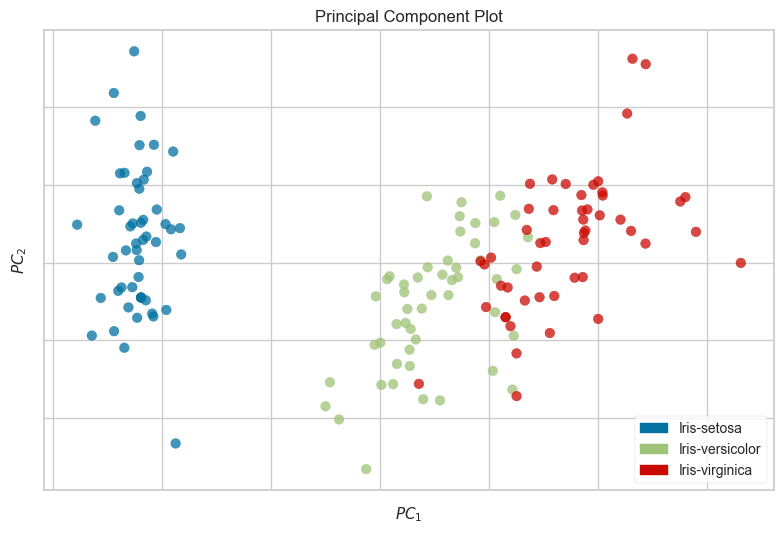

In [5]:
y = df['target'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

visualizer = PCA(scale=True, classes=classes);
visualizer.fit_transform(X, y);
visualizer.show();

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self.fig.tight_layout()


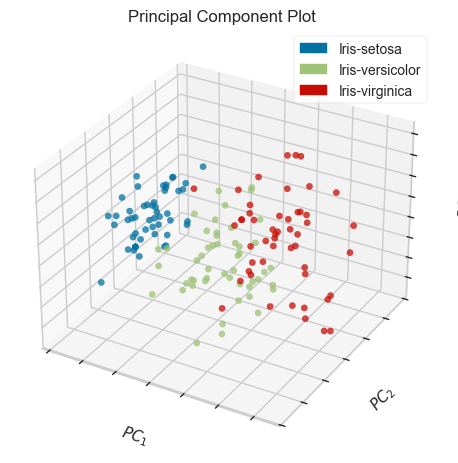

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [6]:
# With yellowbrick we can also plot the PCA in 3D, using the 3 main components.
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

### Biplot
We realized with PCA that, in 2D or 3D and using the main components, we were able to cluster our base into 3 clusters! We can also use PCA to create a `biplot`, which visualizes the PCA plus the vectors for each feature pointing in the direction of maximum variation for that feature.

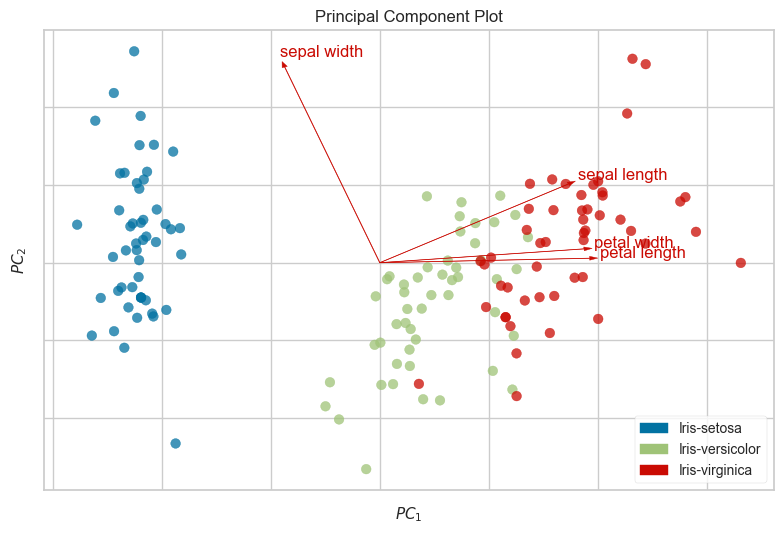

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [7]:
visualizer = PCA(scale=True, projection=2, proj_features=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

We can see from the figure that the greater the value of the variable $PC_2$ and the smaller the value of $PC_1$, we have a greater value of `sepal width`.

## PCA + KMeans

We already know that by applying PCA to our flower base we were able to reduce from 4 to 2 dimensions, keeping the 3 clusters (each type of flower) well defined. Let's now apply KMeans to find these clusters!

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


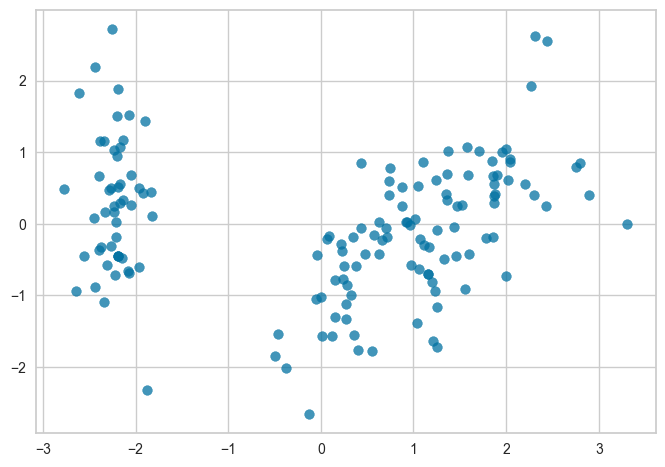

In [8]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=['pc1', 'pc2'])
X_reduced.head()

        pc1       pc2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

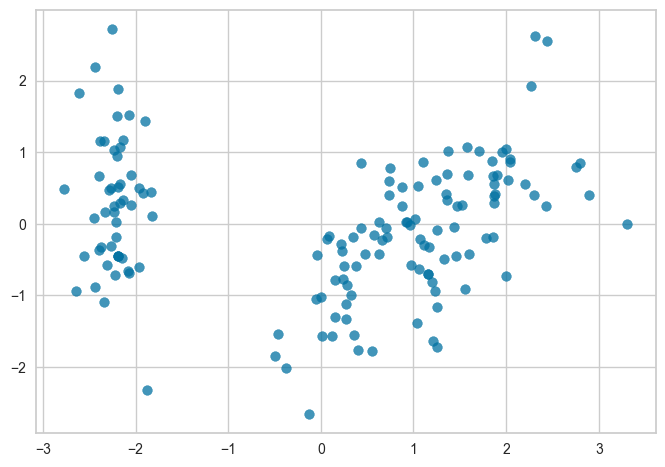

In [9]:
# Create a pipeline with StandardScaler and PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit and transform the data
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=['pc1', 'pc2'])
print(X_reduced.head())

# Access the PCA step from the pipeline
explained_variance_ratio = pca.named_steps['pca'].explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

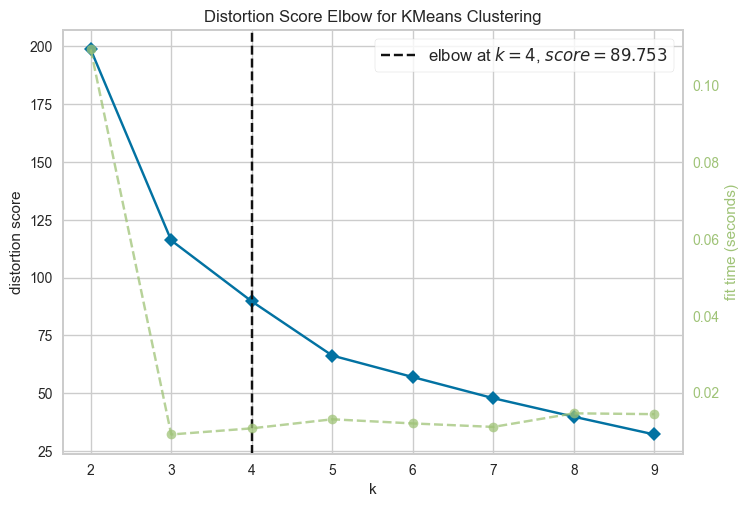

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
kmeans = KMeans(random_state=1234)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_reduced)
visualizer.show()

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
X_reduced['cluster_id'] = kmeans.labels_
X_reduced.head()

,pc1,pc2,cluster_id
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


In [15]:
print(f"Shape of X: {X.shape}")

Shape of X: (150, 4)


In [13]:
# Dynamically adjust n_components to match the number of features
n_components = min(3, X.shape[1])  # Use the minimum of 3 or the number of features
print(f"Reducing to {n_components} dimensions.")

Reducing to 3 dimensions.


In [ ]:
#